# Lab 1 Group 9
## Michael Karaman, Alexys Lamkin, Yiyun Zhang, Ryan Rancani

## Exercise 1 (Lab 1)

### wav file
wav is an audio file format mainly used for uncompressed audio.

### mp3 and compression
mp3 is a coding format for digital audio. MP3 compression reduces the accuracy of certain "unhearable" components.
\
The compression is a process to reduce audio data's transmission bandwidth and storage requirements. During the process, information redundancy is reduced by coding, transformation, prediction or other methods. Compression ratios are around 50-60% of the original size.


### Number of bytes per song
For a 2 minute song:

|Extension|Format|Bitrate|Size|
|------|------|------|------|
|wav|8,000 Hz 16 bit PCM|128kbit/s|1876 kilobyte|
|mp3|8,000 Hz 16 bit MP3 |16kbit/s|234 kilobyte|

The wav file has 1876000 bytes.
\
The mp3 file has 234000 bytes.

### Number of songs on a hard drive
For a 1 terabyte(1TB) hard drive, it can have:
\
$10^{12} bytes \div 1876000 bytes = 533049$ wav songs, or
\
$10^{12} bytes \div 234000 bytes = 4273504$ mp3 songs.

## Exercise 2 (Lab 1)

###Frequency Count Script

In [1]:
import string
import urllib.request

def write_freq(url, out_file_name):
    infile = urllib.request.urlopen(url)

    freq = dict()
    count = 0
    for c in string.ascii_lowercase:
        freq[c] = 0

    for line in infile:
        decoded_line = line.decode("utf-8")
        for c in decoded_line.lower():
            if 'a' <= c and c <= 'z':
                freq[c] = freq[c] + 1
                count = count + 1

    outfile = open(out_file_name,'w')

    keys = sorted(freq)
    for c in keys:
        outfile.write(c+" "+str(float(freq[c])/count)+'\n')
    
    infile.close()
    outfile.close()

#War and Peace
url = "https://www.gutenberg.org/files/2600/2600-0.txt"
write_freq(url,"WarAndPeaceFreq.txt")

#Pride and Prejudice
url = "https://www.gutenberg.org/files/1342/1342-0.txt"
write_freq(url,"PrideAndPrejudiceFreq.txt")

###Visualization

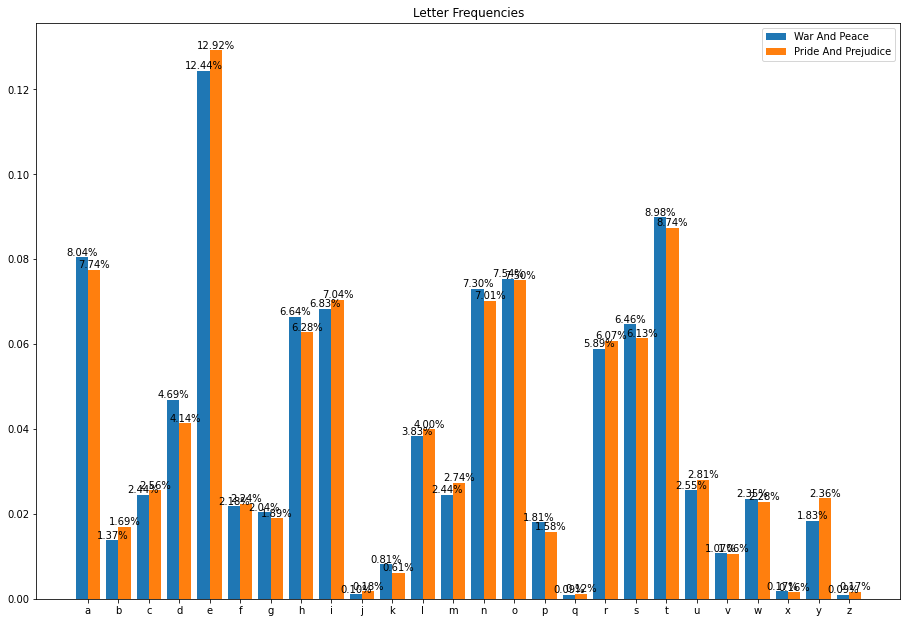

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_info(file_name):
    infile = open(file_name,'r', encoding="utf8")
    letters = list()
    freq = list()

    for i in range(26):
        line = infile.readline().split()
        letters.append(line[0])
        freq.append(float(line[1]))

    return letters, freq

letters1, freq1 = get_info("WarAndPeaceFreq.txt")
letters2, freq2 = get_info("PrideAndPrejudiceFreq.txt")

X_axis = np.arange(len(letters1))
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
plt.xticks(X_axis, letters1)
rects1 = ax.bar(X_axis - 0.2,freq1,0.4,label='War And Peace')
labels1 = ["{:.2%}".format(f) for f in freq1]
for rect, label in zip(rects1, labels1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label, ha='center', va='bottom')
rects2 = ax.bar(X_axis + 0.2,freq2,0.4,label='Pride And Prejudice')
labels2 = ["{:.2%}".format(f) for f in freq2]
for rect, label in zip(rects2, labels2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label, ha='center', va='bottom')
plt.legend()
plt.title("Letter Frequencies")
plt.show()

###Analysis

Between War and Peace (Leo Tolstoy) and Pride and Prejudice (Jane Austen) the letter frequencies are very similar.

## Exercise 3 (Lab 1)

###Calculate Frequency of Words

In [ ]:
import urllib.request

def trim(word): #trim off punctuation (assume lowercase)
    c = word[0]
    while ('a' > c or c > 'z') and ('0' > c or c > '9'):
        word = word[1:]
        if(word == ""): return word
        c = word[0]
    c = word[-1]
    while ('a' > c or c > 'z') and ('0' > c or c > '9'):
        word = word[:-1]
        c = word[-1]
    return word

#url for War and Peace
url = "https://www.gutenberg.org/files/2600/2600-0.txt"
infile = urllib.request.urlopen(url)

freq = dict()
count = 0
for line in infile:
    decoded_line = line.decode("utf-8")
    for word in decoded_line.split():
        word = trim(word.lower())
        if(word == ""): continue
        count += 1
        if word in freq:
            freq[word] += 1
        else:
            freq[word] = 1

outfile = open("results.txt",'w')
sort_words = sorted(freq.items(), key=lambda x: x[1], reverse=True) #sort by value
for word in sort_words:
    outfile.write(word[0]+" "+str(float(word[1])/count)+'\n')

###Visualization

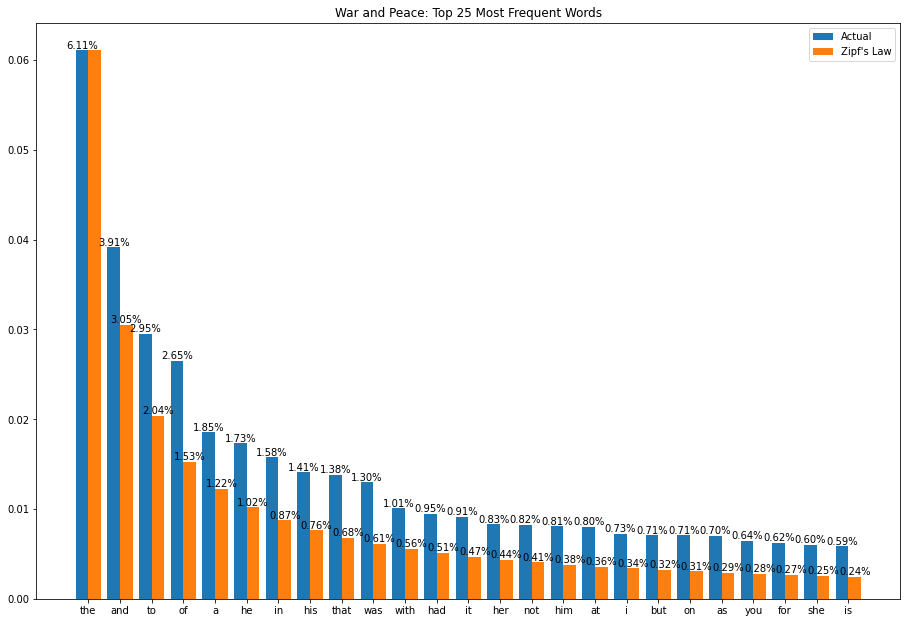

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

NUM_WORDS_TO_PLOT = 25 #plot top x words

infile = open("results.txt",'r', encoding="utf8")
words = list()
freq = list()

for i in range(NUM_WORDS_TO_PLOT):
    line = infile.readline().split()
    words.append(line[0])
    freq.append(float(line[1]))

zipf_freq_max = freq[0]
zipf_freq = [zipf_freq_max/(i+1) for i in range(NUM_WORDS_TO_PLOT)]

X_axis = np.arange(len(words))
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
plt.xticks(X_axis, words)
rects1 = ax.bar(X_axis - 0.2,freq,0.4,label='Actual')
labels1 = ["{:.2%}".format(f) for f in freq]
for rect, label in zip(rects1, labels1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label, ha='center', va='bottom')
rects2 = ax.bar(X_axis + 0.2,zipf_freq,0.4,label='Zipf\'s Law')
labels2 = ["{:.2%}".format(f) for f in zipf_freq]
labels2[0] = None
for rect, label in zip(rects2, labels2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label, ha='center', va='bottom')
plt.legend()
plt.title(f"War and Peace: Top {NUM_WORDS_TO_PLOT} Most Frequent Words")
plt.show()

###Analysis
Zipf's Law says that given a large sample text, the frequency of any word is inversley proportional to it rank in frequency. In other words, the frequecies should be as follows, where $k$ is some constant:

|Freqency Order|Frequency|
|------|------|
|Most Frequent|$k\times \frac{1}{1}$|
|2nd Most Frequent|$k\times \frac{1}{2}$|
|3rd Most Frequent|$k\times \frac{1}{3}$|
|nth Most Frequent|$k\times \frac{1}{n}$|

The visualization above compares actual word frequencies to Zipf's Law for War and Peace. The frequency of the most common word was used as $k$. As can be seen, Zipf's Law is somewhat followed. Both decay exponentially, however the actual frequency distribution does not decay as fast as Zipf's Law predicts.

## Exercise 4 (Lab 1)

###Get Frequencies

For this excerise, we answered three questions for each book that's avaliable on www.gutenberg.org and stored the results for each book in file:


1.   What's the longest word?
2.   How many times is a color mentioned?
3.   What's the frequency of each word?

In order to answer these questions, we first had to split each book into a container of words which included removing non alphanumeric characters. It was fun seeing what questions could be answered using a collection of book data.


In [2]:
import urllib.request
import re

def trim(word): #trim off punctuation (assume lowercase)

    c = word[0]

    while ('a' > c or c > 'z') and ('0' > c or c > '9'):
        word = word[1:]
        if(word == ""): return word
        c = word[0]
    c = word[-1]
    while ('a' > c or c > 'z') and ('0' > c or c > '9'):
        word = word[:-1]
        c = word[-1]
    return word

#url for War and Peace
def get_stats(url, outfile_name):
    infile = urllib.request.urlopen(url)

    #statistic #1: what is the frequency of each word per book?
    freq = dict()
    count = 0
    for line in infile:
        decoded_line = line.decode("utf-8")

        for word in re.sub(r'[\W_]+', ' ', decoded_line).split():
            word = trim(word.lower())
            if(word == "" or word[:4] == 'http'): continue
            count += 1
            if word in freq:
                freq[word] += 1
            else:
                freq[word] = 1

    #sort by value
    sort_words = sorted(freq.items(), key=lambda x: x[1], reverse=True) 

    #statistic #2: what is the longest word in each book?
    words = freq.keys()
    longest_word = sorted(words, key=len, reverse = True)[0]

    #statistic #3: how many times is a color mentioned?
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'violet']
    color_count = 0
    for c in colors:
      if c in words:
        color_count += freq[c]

    #write stats to file
    outfile = open(outfile_name,'w')

    outfile.write("Statistics for book: " + outfile_name.split("_")[0] +'\n')
    outfile.write("Longest word: " + longest_word +', where length is ' + str(len(longest_word)) + '\n')
    outfile.write("Total number of times a color is mentioned: " + str(color_count) + '\n')
    outfile.write(" ----- Word frequencies: ----- \n")

    for word in sort_words:
        outfile.write(word[0]+" "+str(float(word[1])/count)+'\n')

    infile.close()
    outfile.close()

for book in range(1300, 1500):
    url = f"https://www.gutenberg.org/files/{book}/{book}-0.txt"
    outfile_name = f"{book}_results.txt"
    try:
        get_stats(url,outfile_name)
        print(f"{outfile_name} created.")
    except:
        print(f"{url} doesn't exist.")

1300_results.txt created.
1301_results.txt created.
https://www.gutenberg.org/files/1302/1302-0.txt doesn't exist.
1303_results.txt created.
https://www.gutenberg.org/files/1304/1304-0.txt doesn't exist.
1305_results.txt created.
1306_results.txt created.
1307_results.txt created.
1308_results.txt created.
https://www.gutenberg.org/files/1309/1309-0.txt doesn't exist.
1310_results.txt created.
https://www.gutenberg.org/files/1311/1311-0.txt doesn't exist.
1312_results.txt created.
1313_results.txt created.
1314_results.txt created.
https://www.gutenberg.org/files/1315/1315-0.txt doesn't exist.
https://www.gutenberg.org/files/1316/1316-0.txt doesn't exist.
1317_results.txt created.
https://www.gutenberg.org/files/1318/1318-0.txt doesn't exist.
https://www.gutenberg.org/files/1319/1319-0.txt doesn't exist.
1320_results.txt created.
1321_results.txt created.
1322_results.txt created.
https://www.gutenberg.org/files/1323/1323-0.txt doesn't exist.
https://www.gutenberg.org/files/1324/1324-0